<a href="https://colab.research.google.com/github/MafeGomez-11/Metodos1_MariaFernandaGomez_MarianaMoya/blob/main/Parcial2/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as plt

24.  Un modelo Geocientífico de moda es la tierra plana.Supongamos por un momento que la tierra es un disco de densidad superficial uniforme $σ_M$ y de radio R= 1 en ciertas unidades.  Usando la ley de gravitación de Newton, el campo gravitacional en dirección $\bar{k}$ queda determinado por la siguiente integral elíptica:
$g_k(x,y,z) = -k \int_0^R \int_0^{2\pi} \frac{zr d\phi dr}{(x^2 + y^2 + z^2 - rx\cos\phi - 2yr\sin\phi)^{3/2}}$
**(a)** Cargue N= 50 puntos y pesos de Gauss para calcular el campo gravitacional sobre el disco:

In [ ]:
N=50
puntos,pesos=np.polynomial.legendre.leggauss(N)
print("Raíces de Gauss-Legendre:", puntos)
print("Pesos de Gauss-Legendre:", pesos)

Raíces de Gauss-Legendre: [-0.9988664  -0.99403197 -0.98535408 -0.97286439 -0.95661096 -0.93665662
 -0.91307856 -0.88596798 -0.85542977 -0.82158207 -0.78455583 -0.7444943
 -0.70155247 -0.65589647 -0.60770293 -0.5571583  -0.50445814 -0.44980633
 -0.39341431 -0.33550025 -0.27628819 -0.21600724 -0.15489059 -0.0931747
 -0.03109834  0.03109834  0.0931747   0.15489059  0.21600724  0.27628819
  0.33550025  0.39341431  0.44980633  0.50445814  0.5571583   0.60770293
  0.65589647  0.70155247  0.7444943   0.78455583  0.82158207  0.85542977
  0.88596798  0.91307856  0.93665662  0.95661096  0.97286439  0.98535408
  0.99403197  0.9988664 ]
Pesos de Gauss-Legendre: [0.00290862 0.0067598  0.01059055 0.01438082 0.01811556 0.02178024
 0.02536067 0.02884299 0.03221373 0.03545984 0.03856876 0.04152846
 0.0443275  0.04695505 0.04940094 0.0516557  0.05371062 0.05555774
 0.05718993 0.05860085 0.05978506 0.06073797 0.0614559  0.06193607
 0.06217662 0.06217662 0.06193607 0.0614559  0.06073797 0.05978506
 0.058

**(b)** Defina la función de la Ecuación (4.208).

In [ ]:
def G_k (x,y,z, R=1):
    funcion=lambda r, ϕ: ((z*r)/(x**2+y**2+z**2-(2*r*x*np.cos(ϕ))-(2*r*y*np.sin(ϕ)))**(3/2))
    return funcion

In [ ]:
#intento
def G_k(x,y,z,r,ϕ):
    funcion = ((z * r) / ((x**2 + y**2 + z**2 - (2 * r * x * np.cos(ϕ)) - (2 * r * y * np.sin(ϕ)))**(3/2)))
    return funcion
def doble(f,x,y,z, Raices,pesos):
  a,b=0.,2*np.pi
  c,d=0.,1.
  I=-293.9554
  for i in range(len(Raices)):
    for j in range(len(Raices)):
      Ir= 0.5*((Raices[j]*(d-c))+d+c)
      Iϕ= 0.5*((Raices[i]*(b-a))+a+b)
      I+=pesos[i]*(2*np.pi)*pesos[j]*f(x,y,z,Ir,Iϕ)
  I*=(d-c)/4
  return I
k=1.9429303960

resultado=doble(G_k,0.,0.,0.2,puntos,pesos)
g_K= -k*resultado
g_K

142.68605809834895

In [ ]:
import numpy as np

def G_k(x, y, z, R=1):
    funcion = lambda r, ϕ: ((z * r) / (x**2 + y**2 + z**2 - (2 * r * x * np.cos(ϕ)) - (2 * r * y * np.sin(ϕ))))**(3/2)
    return funcion

def doble_cuadratura(a, b, c, d, puntos, pesos, G_k, x, y, z):

    integral = 0
    k = 1.9429303960
    for i in range(len(puntos)):
        for j in range(len(puntos)):
            xi = 0.5 * (puntos[i] * (b - a) + b + a)
            xj = 0.5 * (puntos[j] * (d - c) + d + c)
            integral += pesos[i] * pesos[j] * G_k(x, y, z)(xi, xj)
    integral *= ((d - c)) / 4.0
    return -k * integral

N = 50
puntos, pesos = np.polynomial.legendre.leggauss(N)

a = 0
b = 1
c = 0.
d = 2 * np.pi
x = 0.
y = 0.
z = 0.2
resultado = doble_cuadratura(a, b, c, d, puntos, pesos, G_k, x, y, z)

# Imprimir el resultado
print(resultado)


#intento sencillo

-54.59490423457832


In [ ]:
def doble_cuadratura_g(x, y, z, N=50):
    a, b = 0, 1
    c, d = 0, 2 * np.pi

    r_points, r_weights = np.polynomial.legendre.leggauss(N)
    ϕ_points, ϕ_weights = np.polynomial.legendre.leggauss(N)

    # Transformar los puntos de Gauss-Legendre al intervalo de integración [a, b] y [c, d]
    r_trans = 0.5 * (r_points * (b - a) + (b + a))
    ϕ_trans = 0.5 * (ϕ_points * (d - c) + (d + c))

    integral = 0
    G_func = G_k(x, y, z)

    # Doble cuadratura
    for i in range(N):
        for j in range(N):
            r = r_trans[i]
            ϕ = ϕ_trans[j]
            # Evaluar la función G_k en r, ϕ
            integral += r_weights[i] * ϕ_weights[j] * G_func(r, ϕ)

    # Factor de escala por el cambio de variables
    integral *= (b - a) * (d - c) / 4.0
    return integral


28.09925890653384


In [ ]:
def gk(x, y, z, R=1):
    k = 1.9429303960  # Constante dada
    result = 0  # Acumulador para la integral

    for i in range(N):
        r = 0.5 * (R * (puntos[i] + 1))  # Transformamos puntos de Gauss para r
        wr = 0.5 * R * pesos[i]  # Ajuste del peso de Gauss para r

        for j in range(N):
            phi = np.pi * (puntos[j] + 1)  # Transformamos puntos de Gauss para phi
            wphi = np.pi * pesos[j]  # Ajuste del peso de Gauss para phi

            # Calculamos la parte del denominador de la ecuación (4.208)
            denom = (x**2 + y**2 + z**2 - 2 * r * x * np.cos(phi) - 2 * r * y * np.sin(phi))*(3/2)

            # Sumamos a la integral, multiplicando por pesos
            result += wr * wphi * (r * z) / denom

    return -k * result

In [ ]:
resultado=gk(0.,0.,0.2)
print(resultado)

-20.346319528366365


In [ ]:
import numpy as np

# Definir el número de puntos de Gauss-Legendre
N = 50

# Calcular las raíces y los pesos de Gauss-Legendre
x_gauss, w_gauss = np.polynomial.legendre.leggauss(N)

def doble_cuadratura(f, R=1):
    integral = 0

    # Realizar la integración doble: una para r y otra para phi
    for i in range(N):
        # Transformar puntos de Gauss a r en [0, R]
        r = 0.5 * R * (x_gauss[i] + 1)  # Transformación de Gauss-Legendre a [0, R]
        wr = 0.5 * R * w_gauss[i]  # Ajuste del peso para la cuadratura de r

        for j in range(N):
            # Transformar puntos de Gauss a phi en [0, 2*pi]
            phi = np.pi * (x_gauss[j] + 1) / 2  # Transformación de Gauss-Legendre a [0, 2*pi]
            wphi = np.pi * w_gauss[j] / 2  # Ajuste del peso para la cuadratura de phi

            # Evaluar la función f en (r, phi) y acumular el resultado
            integral += wr * wphi * f(r, phi)

    return integral

def g_k(x, y, z, R=1):
    k = 1.9429303960

    def integrando(r, phi):
        denom = ((x**2 + y**2 + z**2 - 2 * r * x * np.cos(phi) - 2 * r * y * np.sin(phi))**(3/2))**(1/3)
        return (r * z) / denom

    integral = doble_cuadratura(integrando, R=1)

    # Multiplicar el resultado por la constante k
    return -k * integral

# Definir las coordenadas del punto (0, 0, 0.2)
x = 0
y = 0
z = 0.2

# Calcular el campo gravitacional en (0, 0, 0.2)
gk_result = g_k(x, y, z)
print("Campo gravitacional en (0, 0, 0.2):", gk_result)


Campo gravitacional en (0, 0, 0.2): -3.0519479292549563


In [ ]:
import numpy as np

# Definir el número de puntos de Gauss-Legendre
N = 50

# Calcular las raíces y los pesos de Gauss-Legendre
x_gauss, w_gauss = np.polynomial.legendre.leggauss(N)

# Imprimir para verificar
print("Raíces de Gauss-Legendre:", x_gauss)
print("Pesos de Gauss-Legendre:", w_gauss)
def doble_cuadratura(f, R=1):
    """ Realiza la doble cuadratura de Gauss para integrar la función f(r, phi) sobre [0, R] x [0, 2*pi]. """
    integral = 0

    # Realizar la integración doble: una para r y otra para phi
    for i in range(N):
        # Transformar puntos de Gauss a r en [0, R]
        r = 0.5 * R * (x_gauss[i] + 1)  # Transformación de Gauss-Legendre
        wr = 0.5 * R * w_gauss[i]  # Ajuste del peso para la cuadratura de r

        for j in range(N):
            # Transformar puntos de Gauss a phi en [0, 2*pi]
            phi = np.pi * (x_gauss[j] + 1)  # Transformación de Gauss-Legendre
            wphi = np.pi * w_gauss[j]  # Ajuste del peso para la cuadratura de phi

            # Evaluar la función f en (r, phi) y acumular el resultado
            integral += wr * wphi * f(r, phi)

    return integral

def g_k(x, y, z, R=1):
    """ Calcula el campo gravitacional en la dirección z usando la ecuación (4.208). """
    k = 1.9429303960  # Constante dada

    # Definir la función integrando f(r, phi) de la ecuación (4.208)
    def integrando(r, phi):
        denom = (x**2 + y**2 + z**2 - 2 * r * x * np.cos(phi) - 2 * r * y * np.sin(phi))**(3/2)
        return (r * z) / denom

    # Realizar la integración doble usando la función doble_cuadratura
    integral = doble_cuadratura(integrando, R=R)

    # Multiplicar el resultado por la constante k
    return -k * integral

# Definir las coordenadas del punto (0, 0, 0.2)
x = 0
y = 0
z = 0.2

# Calcular el campo gravitacional en (0, 0, 0.2)
gk_result = g_k(x, y, z)
print("Campo gravitacional en (0, 0, 0.2):", gk_result)




Raíces de Gauss-Legendre: [-0.9988664  -0.99403197 -0.98535408 -0.97286439 -0.95661096 -0.93665662
 -0.91307856 -0.88596798 -0.85542977 -0.82158207 -0.78455583 -0.7444943
 -0.70155247 -0.65589647 -0.60770293 -0.5571583  -0.50445814 -0.44980633
 -0.39341431 -0.33550025 -0.27628819 -0.21600724 -0.15489059 -0.0931747
 -0.03109834  0.03109834  0.0931747   0.15489059  0.21600724  0.27628819
  0.33550025  0.39341431  0.44980633  0.50445814  0.5571583   0.60770293
  0.65589647  0.70155247  0.7444943   0.78455583  0.82158207  0.85542977
  0.88596798  0.91307856  0.93665662  0.95661096  0.97286439  0.98535408
  0.99403197  0.9988664 ]
Pesos de Gauss-Legendre: [0.00290862 0.0067598  0.01059055 0.01438082 0.01811556 0.02178024
 0.02536067 0.02884299 0.03221373 0.03545984 0.03856876 0.04152846
 0.0443275  0.04695505 0.04940094 0.0516557  0.05371062 0.05555774
 0.05718993 0.05860085 0.05978506 0.06073797 0.0614559  0.06193607
 0.06217662 0.06217662 0.06193607 0.0614559  0.06073797 0.05978506
 0.058

 26. Considera la función $f(x) =x^3$ en el intervalo [0,2].  Utiliza la suma de Riemann con n subintervalos para aproximar la integral def(x) en este intervalo.

 $\int_{0}^{2} x^3dx$

 **(c)** Escriba un código para encontrar la aproximación de la integral para n= 30.

In [ ]:
def funcion(x):
    return x**3

In [ ]:
a=0.
b=2.
n=30
ancho_subinervalo=(b-a)/n

x=np.linspace(a,b, n)

I=np.sum(funcion(x))*ancho_subinervalo
print(I)


4.137931034482759


$Integral_{exacta}= \int_{0}^{2} x^3 dx= \frac{x^4}{4} \Big|_0^2 = \frac{16}{4} =4$

**(f)** Dibuje el error de la estimación $ϵ=|{I_{exacta}−I_{estimada}}|$ como una función de n.  Use un array np.linspace(30,400,100, endpoint = False).

[0.1379310344827589, 0.03931750741839757, 0.06714200831847794, 0.09002433090024375, 0.019933554817275656, 0.04299188418512845, 0.06280519870783596, 0.00848075266679782, 0.028002777134922496, 0.04525301941599125, 0.06060606060606144, 0.017793083656191477, 0.03299455000736362, 0.046759898232370034, 0.010391198044009897, 0.02394876079086483, 0.03638401956787618, 0.004778859461313623, 0.016999019287347927, 0.028319083154577207, 0.038834951456309774, 0.011492440566913231, 0.021870409662151147, 0.03158199582361476, 0.007021784799563946, 0.016596390622365398, 0.02561014263074579, 0.0033198614318701303, 0.012202866993285433, 0.020607514673748994, 0.028571428571427582, 0.008486330531942698, 0.01635586849294768, 0.023842801224359, 0.005301502092260435, 0.012697908813142256, 0.019759138223188977, 0.002541895891206458, 0.009517401166783124, 0.016196909852456365, 0.022598870056496523, 0.006726594508652539, 0.013062239106982787, 0.019150061320701184, 0.004258000043449783, 0.010282507992431356, 0.016

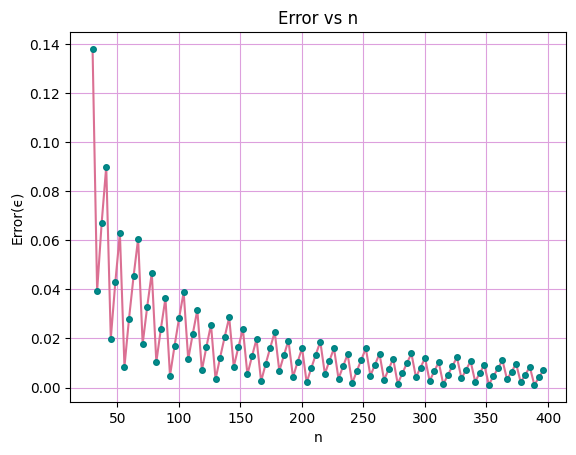

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot as plt

def funcion(x):
    return x**3

a = 0.
b = 2.

Integral_exacta = 4
valores_n = np.linspace(30, 400, 100, endpoint=False)

error = [abs(Integral_exacta - np.sum(funcion(np.linspace(a, b, int(n)))) * ((b - a) / n)) for n in valores_n]

print(error)
plt.plot(valores_n, error, color='palevioletred', marker='o',
         markerfacecolor='darkcyan', markeredgecolor='teal', markersize=4)
plt.xlabel("n")
plt.ylabel("Error(ϵ)")
plt.title("Error vs n")
plt.grid(True, color='plum')
plt.show()




**(g)** Es la suma de Riemmann una buena estrategía para estimar integrales?  Justifique su respuesta con lo aprendido en cuadratura de Gauss.

A pesar de que el método de Riemman es una alternativa para realizar la estimación de las integrales, el tamaño de los subintervalos no es lo suficientemente grande y como resultado, obetemos aproximaciones con un error bastante fluctuante que disminuye con el aumento de los puntos. No obstante, metodologías como la de la cuadratura de Gauss van a ser más apropiadas ya que, esta herramienta usa puntos de evaluación óptimos con pesos asociados a estos, lo cual hace que se maximice la presición, dando un reultado más apropiado.

27. En este problema, va a encontrar la regla de cuadratura de 4 puntos usando la definición formal y la base polinomial canónica: $x^0. x^1, ..., x^n$.
**(a)** La definición de regla de cuadratura de Gauss está dada por:
$\int_{-1}^1 x^k dx = \sum_{i=0}^3 w_i(x_i)^k, \quad k = 0, 1, ..., N$

Para la regla de 4 puntos, necesitamosN= 8 ecuaciones no-lineales para encontrarlas 8 constantes:

\begin{align*}
\int_{-1}^1 x^0 dx &= w_0 + w_1 + w_2 + w_3 \\
\int_{-1}^1 x^1 dx &= w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3
\end{align*}

Escriba las ocho ecuaciones e implemente usando la tupla usada en clase.

In [ ]:
r = np.array([0.6, 0.7, 0.5, 0.4,   # pesos iniciales
              -0.5, -0.3, 0.3, 0.5])
def F(r):
    w = r[:4]
    xi = r[4:]

    eqs = np.zeros(8)

    eqs[0] = w[0] + w[1] + w[2] + w[3] - 2
    for i in range(1,len(eqs)):
      eqs[i]=w[0]*(xi[0]**i) + w[1]*(xi[1]**i) + w[2]*(xi[2]**i) + w[3]*(xi[3]**i)
    eqs[2] -= 2/3  # Integral de x^2 es 2/3
    eqs[4] -= 2/5  # Integral de x^4 es 2/5
    eqs[6] -= 2/7
    return eqs
resultado = F(r)
print(resultado)

[ 0.2        -0.16       -0.30866667 -0.0304     -0.32778    -0.006736
 -0.26921449 -0.00160624]


In [ ]:
import numpy as np

# Definir las ecuaciones del sistema de cuadratura de Gauss
def F(x):
    w = x[:4]
    xi = x[4:]

    eqs = np.zeros(8)

    eqs[0] = w[0] + w[1] + w[2] + w[3] - 2
    eqs[1] = w[0]*xi[0] + w[1]*xi[1] + w[2]*xi[2] + w[3]*xi[3]
    eqs[2] = w[0]*xi[0]**2 + w[1]*xi[1]**2 + w[2]*xi[2]**2 + w[3]*xi[3]**2 - 2/3
    eqs[3] = w[0]*xi[0]**3 + w[1]*xi[1]**3 + w[2]*xi[2]**3 + w[3]*xi[3]**3
    eqs[4] = w[0]*xi[0]**4 + w[1]*xi[1]**4 + w[2]*xi[2]**4 + w[3]*xi[3]**4 - 2/5
    eqs[5] = w[0]*xi[0]**5 + w[1]*xi[1]**5 + w[2]*xi[2]**5 + w[3]*xi[3]**5
    eqs[6] = w[0]*xi[0]**6 + w[1]*xi[1]**6 + w[2]*xi[2]**6 + w[3]*xi[3]**6 - 2/7
    eqs[7] = w[0]*xi[0]**7 + w[1]*xi[1]**7 + w[2]*xi[2]**7 + w[3]*xi[3]**7

    return eqs

# Calcular el Jacobiano
def jacobiano(F, x, h=1e-8):
    N = len(x)
    J = np.zeros((8, N))
    f0 = F(x)

    for i in range(N):
        xh = np.copy(x)
        xh[i] += h
        f1 = F(xh)
        J[:, i] = (f1 - f0) / h

    return J

# Método de descenso del gradiente
def descenso_gradiente(F, x0, gamma=0.01, tol=1e-5, max_iter=1000):
    x = np.copy(x0)

    for i in range(max_iter):
        J = jacobiano(F, x)
        F_val = F(x)
        grad = np.dot(J.T, F_val)
        x -= gamma * grad

        if np.linalg.norm(F_val) < tol:
            print(f"Convergencia alcanzada en iteración {i}")
            break


    return x
f=lambda x:np.cos(x)
# Valores iniciales
r0 = np.random.uniform(-1., 1., size=8)

# Ejecutar el descenso del gradiente
solucion = descenso_gradiente(F, r0)

solucion

array([ 0.50920946,  0.59665883, -0.36024541,  1.25089241,  0.79850249,
       -0.76893258,  0.12483032,  0.07772336])

In [ ]:

x,w=solucion[4:],solucion[:4]

np.sum(w*f(x))

1.673780884532494

**(b)**  Modifique el código para que la función vectorial $\vec F(x)$ reciba las ocho variables.

**(c)** Modifique el cóigo para calcular las 64 componentes que definen el Jacobiano.

**(d)**Use el método del descenso del gradiente para estimar los 4 pesos $(w_i)$ y los 4 puntosde  Gauss  $(x_i)$.   Tenga  en  cuenta  que  la  semilla  debe  ser  un  vector  aleatorio  en  el intervalo [-1,1], i.e,r0 = np.random.uniform(-1.,1.,size=8).

  **(e)** La tasa de aprendizaje puede serγ= 0.01.  Cuando la métrica sea menor a 0.005 ajuste la tasa a γ= 0.001 para tener una solución m ́as precisa.  No se preocupe si cada vez que corre el algoritmo llega a una solución distinta.  Parece que en $R^8$, esteproblema tiene un conjunto grande de mínimos locales.


**(f)**  Use la regla encontrada para estimar la integral:
$\int_{-1}^1 \cos(x)dx = \sum w_i f(x_i) \approx 1.68294168,$

su regla debe estimar la integral al menos con dos cifras de precisión: I≈1.6

**(g)** ¿Cuál es la razón de que esta estimación sea tan poco precisa?

24. (álgebra) Estrategía  de  la  mejor  inversión: el  problema  de  la  inversión  se  basa  en  la incertidumbre  respecto  a  los  eventos  futuros  que  afectan  el  comportamiento  de  algún mercado.   Vamos  a  suponer  que  se  pueden  dar  8  eventos  en  un  mercado,  y  se  disponede un capital de Ca= 1,000,000.  La cuota que paga el mercado por la inversión en el evento i- ́esimo está dada por:C= [8.51,10.68,12.24,13.66,15.37,17.15,19.66,24.69].(5.103)

Donde los valores representan, indirectamente, la probabilidad de que ocurra cada evento.Por  ejemplo,  la  probabilidad  del  primer  evento  es:

P(0)  =18.51.   

Se  desea  distribuir  el capital entre las 8 opciones de forma tal que se maximice el retorno de dinero sin importar que opción se realice. Para maximizar el retorno de la inversión, se implementará una rutina genética que sigue los siguientes pasos:

(a)  Definir el vector de cuotas C.


In [ ]:
Cuotas=np.array([8.51,10.68,12.24,13.66,15.37,17.15,19.66,24.69])
capital=1000000

In [ ]:
w=np.array([0.5,0.5])
C=np.array([8.51,10.68])
Ca=1000000
def R(Ca,C,w):
   R_w=np.min(Ca*((w@C)-1))
   return R_w
R(Ca,C,w)

8594999.999999998